In [ ]:
# Import da biblioteca

import pandas as pd
idx = pd.IndexSlice

In [ ]:
# Preparando o Dataset

links = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/links.csv",  index_col=['movieId'])
movies = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/movies.csv", sep=",", index_col=['movieId'])
ratings = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/ratings.csv", index_col=['userId','movieId'])
tags = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/tags.csv", index_col=['userId','movieId'])

In [ ]:
print("Total de usuários na base: %i" % len(list(set([x[0] for x in ratings.index.values]))))
print("Total de filmes: %i" % (movies.shape[0]))
print("Total de avaliações: %i" % (ratings.shape[0]))


Total de usuários na base: 610
Total de filmes: 9742
Total de avaliações: 100836


In [ ]:
def get_movies_by_user(id_user, rating_cut=0, list_=False):
    
    """Retorna a lista de filmes avaliados por um usuário

    Keyword arguments:
    id_user -- id do usuário
    rating_cut -- retorna só itens avaliados com rating maior e igual que rating_cut (default: 0)
    list_ -- se True retorna somente os ids dos filmes, se False retorna os ids com o valor do rating (default: False)
    
    """

    
    return_dict = {}
    dict_ = ratings.loc[idx[id_user, :], 'rating'].T.to_dict()
    
    for d in dict_:
        if rating_cut != 0:
            if dict_[d] >= rating_cut:
                return_dict[d[1]] = dict_[d]
        else:
            return_dict[d[1]] = dict_[d]
    
    if list_:
        return list(return_dict.keys())

    return return_dict

def get_users_by_movie(id_movie, rating_cut=0, list_=False):
    
    """Retorna a lista de usuários que avaliaram determinado filme

    Keyword arguments:
    id_movie -- id do filme
    rating_cut -- retorna só usuários que avaliaram o filme com rating maior e igual que rating_cut (default: 0)
    list_ -- se True retorna somente os ids dos usuários, se False retorna os ids com o valor do rating
    
    """
    
    return_dict = {}

    try:
      dict_ = ratings.loc[idx[:, id_movie],'rating'].T.to_dict()

      for d in dict_:
        if rating_cut != 0:
            if dict_[d] >= rating_cut:
                return_dict[d[0]] = dict_[d]
        else:
            return_dict[d[0]] = dict_[d]
    
    except KeyError as e:
      pass
    
    
        
    if list_:
        return list(return_dict.keys())
    
    return return_dict


def get_rating_by_user_movie(id_user, id_movie):
    
    """Retorna o rating que o usuário (id_user) deu para um filme (id_movie). Se não existir, retorna 0.0.

    Keyword arguments:
    id_user -- id do usuário
    id_movie -- id do filme
    
    """
    
    rating = 0.0;
    
    try:
        rating = ratings.loc[idx[id_user, id_movie], 'rating']
    except KeyError as e:
        rating = 0.0

    return rating

def get_movie_title(id_movie):
    
    """Retorna o título de um filme.

    Keyword arguments:
    id_movie -- id do filme
    
    """
    
    info = movies.loc[idx[id_movie], :]
    return info['title']


def get_all_users(ratings_):
    
    """Retorna o id de todos os usuários.
    
    """
    
    return list(set([x[0] for x in ratings_.index.values]))

In [ ]:
all_users = get_all_users(ratings)

In [ ]:
'''
    Neste trecho vamos armazenar em memória as informações de filmes avaliados pelos usuários. Isso evitar 
    fazermos muitos acesso a estrutura do DataFrame. 
'''

all_users = get_all_users(ratings)

movies_user = {}

for user in all_users:
    movies_user[user] = get_movies_by_user(user, rating_cut=5, list_=True)



In [ ]:
'''
    Neste trecho vamos armazenar em memória as informações de usuários que avaliaram determinado filme. Isso evitar 
    fazermos muitos acesso a estrutura do DataFrame. 
'''

user_movies = {}

for movie in list(movies.index):
  user_movies[movie] = get_users_by_movie(movie, rating_cut=5, list_=True)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for user in all_users:
  node_name = "User" + str(user)
  G.add_node(node_name)

for user in all_users:
  my_movies = movies_user[user]


  # Lista de todos os usuários que avaliaram os filmes assistidos por A
  all_users = []

  for movie in my_movies:
      all_users = all_users + user_movies[movie]

  all_users = list(set(all_users))
  
  for neigh in all_users:
    user_a = "User" + str(user)
    user_b = "User" + str(neigh)
    G.add_edge(user_a,user_b)

 

In [ ]:
print("Total de vértices: %i" % G.number_of_nodes())
print("Total de arestas: %i" % G.number_of_edges())

Total de vértices: 610
Total de arestas: 62369


In [ ]:
all_adjacentes = list(G.adj['User3'])
print("Adjacentes ao usuário 3: %s" % all_adjacentes)

Adjacentes ao usuário 3: ['User1', 'User610', 'User3', 'User452', 'User303', 'User532', 'User599', 'User312', 'User313', 'User603', 'User91', 'User380', 'User382', 'User95']


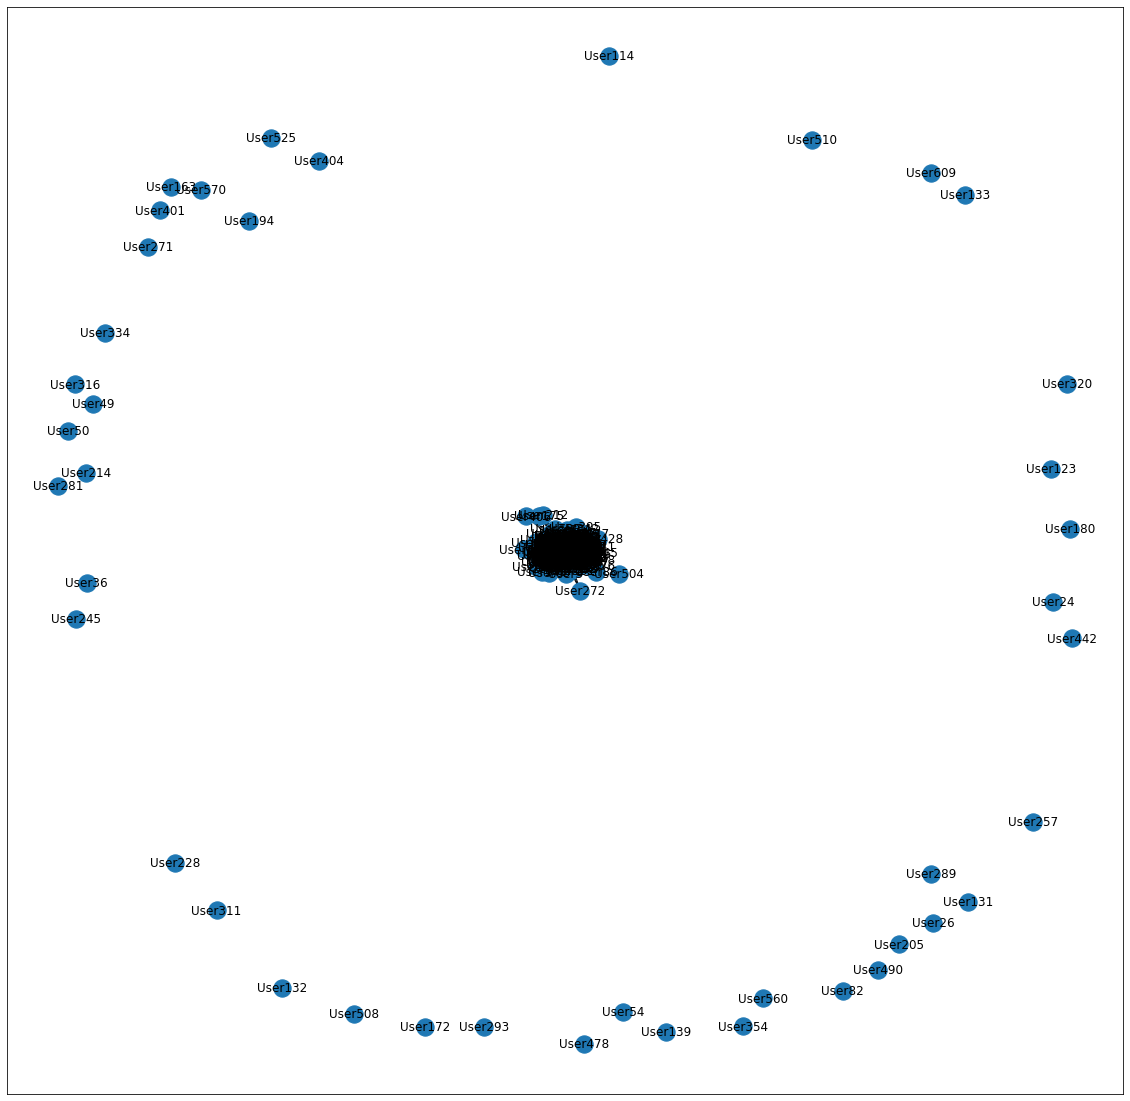

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

In [ ]:

from collections import Counter

# Modelo do método que deve ser implementado
def recomendacao(user, G):

  """Retorna a lista de filmes recomendados dado um usuário e um grafo representativo da base

    Keyword arguments:
    user -- usuário
    id_movie -- Grafo na estrutura do NetworkX
    
    """
  vizinhos = list(G.adj[user])
  lista_filmes = []
  for vizinho in vizinhos:
    id = int(vizinho.split('User')[1])   
    filmes = get_movies_by_user(id, rating_cut=5, list_=True)
    lista_filmes = lista_filmes + filmes
  
  c = Counter(lista_filmes)
  list_of_movies_recommended = c.most_common()[:5]
  list_of_movies_recommended = [x[0] for x in list_of_movies_recommended]
  list_of_movies_recommended = [movies.iloc[x]['title'] for x in list_of_movies_recommended]

  return list_of_movies_recommended

recomendacao('User3',G)

['John Q (2002)',
 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)',
 'Picture Perfect (1997)',
 'Quiz Show (1994)',
 'Career Girls (1997)']

### Utilizando a API do IMDb

Podemos utilizar a API do IMDb para retornar algumas informações a mais sobre os filmes recomendados. O código a seguir importa a biblioteca e com as informações contidas na tabela **links** da Movielens acessa detalhes dos filmes na base do IMDb. Vamos utilizar a biblioteca **imdbpie**: https://github.com/richardasaurus/imdb-pie.

In [ ]:
# Instalando a biblioteca do imdbpie
!pip install imdbpie

     |████████████████████████████████| 1.4MB 4.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for trans: filename=trans-2.1.0-cp37-none-any.whl size=7092 sha256=c87d7269229058bd94b43d68155d137cc169d21fd17952e022bf94844dcb40bd
  Stored in directory: /root/.cache/pip/wheels/fe/82/7c/5b95427122e0d3298d3a3b85f3a16e4be2add8779d56b28ca6
Successfully built trans
ERROR: tensorflow 2.5.0 has requirement wheel~=0.35, but you'll have wheel 0.30.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: attrs 21.2.0
    Uninstalling attrs-21.2.0:
      Successfully uninstalled attrs-21.2.0
  Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2


In [ ]:
# Imports necessários

from imdbpie import Imdb
from IPython.display import Image, display

In [ ]:
# Método que retorna o ID do IMDb dado o id do filme

def get_imdb_id(id_movie):
    
    imdbid = int(links.loc[idx[id_movie], 'imdbId'])
    
    imdbid = "tt%.7d" % imdbid
    
    return imdbid

In [ ]:
# Carregando a biblioteca do IMDb
imdb = Imdb()


In [ ]:
# Pegando informações do filme 1
imdbid = get_imdb_id(1)
movie_ = imdb.get_title(imdbid)
print(movie_)

{'@type': 'imdb.api.title.auxiliary.v1', 'base': {'id': '/title/tt0114709/', 'image': {'height': 1500, 'id': '/title/tt0114709/images/rm3813007616', 'url': 'https://m.media-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_.jpg', 'width': 1005}, 'runningTimeInMinutes': 81, 'title': 'Toy Story', 'titleType': 'movie', 'year': 1995}, 'filmingLocations': [{'id': '/title/tt0114709/filminglocations/lc1002443', 'interestingVotes': {'up': 4}, 'location': 'Pixar Animation Studios - 1200 Park Avenue, Emeryville, California, USA'}, {'id': '/title/tt0114709/filminglocations/lc1002444', 'interestingVotes': {'up': 3}, 'location': 'Walt Disney Feature Animation - 500 S. Buena Vista Street, Burbank, California, USA'}, {'id': '/title/tt0114709/filminglocations/lc1804708', 'interestingVotes': {'up': 1}, 'location': 'New York City, New York, USA'}], 'metacriticScore': {'@type': 'imdb.api.title.metacritic.score', 'metaScore': 95, 'metacriticUrl': 'htt

A variável movie tem um monte de informações dos filmes. Podemos ver o que é disponibilizado a partir do código a seguir:

In [ ]:
movie_.keys()

dict_keys(['@type', 'base', 'filmingLocations', 'metacriticScore', 'plot', 'ratings', 'similarities', 'soundtrack'])

Algumas informações mais úteis estão dentro de `base`.

In [ ]:
movie_['base'].keys()

dict_keys(['id', 'image', 'runningTimeInMinutes', 'title', 'titleType', 'year'])

Imprimindo algumas informções:

In [ ]:
print("Título: %s" % movie_['base']['title'])
print("Ano: %i" % movie_['base']['year'])
print("Gênero: %s" % imdb.get_title_genres(imdbid)['genres'])

Título: Toy Story
Ano: 1995
Gênero: ['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy']


Para ver o que mais podemos extrair dos filmes, basta acessar a [página da API](https://github.com/richardasaurus/imdb-pie).